### 분석 주제 
+ 호선별 이용객수 차이
+ 시간대별 이용객수 차이 
+ 역별 이용객수 차이 
+ 상권 세부 분석 with 카페갯수 

In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
from matplotlib import font_manager, rc
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 지하철 호선 별 상위 3개 승하차

In [ ]:
# subway = pd.read_csv("C:/Users/Juyeon/Downloads/subway.csv", encoding="cp949")
# subway = subway.loc[:,["역명","승하","17~18","18~19","19~20","20~21","21~22","22~23","23~24"]]

# #1호선 이름 추출
# subway_one_name = subway[:64][subway['승하'] == '승차']
# subway_one_name = subway_one_name['역명']
# print(subway_one_name.count())
# #2호선 이름 추출
# subway_two_name = subway[64:122][subway['승하'] == '승차']
# subway_two_name = subway_two_name['역명']
# print(subway_two_name.count())
# #3호선 이름 추출
# subway_thr_name = subway[122:182][subway['승하'] == '승차']
# subway_thr_name = subway_thr_name['역명']
# #1호선
# subway_one = subway[subway['역명'].isin(subway_one_name)]
# up_one = subway_one[subway_one['승하'] == '승차']
# up_one = up_one.groupby(['역명']).sum()
# down_one = subway_one[subway_one['승하'] == '하차']
# down_one = down_one.groupby(['역명']).sum()
# #2호선
# subway_two = subway[subway['역명'].isin(subway_two_name)]
# up_two = subway_two[subway_two['승하'] == '승차']
# up_two = up_two.groupby(['역명']).sum()
# down_two = subway_two[subway_two['승하'] == '하차']
# down_two = down_two.groupby(['역명']).sum()
# # #3호선
# subway_thr = subway[subway['역명'].isin(subway_thr_name)]
# up_thr = subway_thr[subway_thr['승하'] == '승차']
# up_thr = up_thr.groupby(['역명']).sum()
# down_thr = subway_thr[subway_thr['승하'] == '하차']
# down_thr = down_thr.groupby(['역명']).sum()

## Creating Data Frames 

In [30]:
# subway_total: total values from 1st to 3rd line of subway. 
subway_total = pd.read_csv("C:/Users/Juyeon/Downloads/subway.csv", encoding="cp949")

# subway: basic dataframe for each subway line. 
subway = pd.read_csv("C:/Users/Juyeon/Downloads/subway.csv", encoding="cp949")

In [5]:
# up_total: number of passengers getting on the subway 
# down_total: number of passengers getting off from the subway

up_total = subway_total[subway_total['승하'] == '승차']
up_total = up_total.groupby(['역명']).sum()

down_total = subway_total[subway_total['승하'] == '하차']
down_total = down_total.groupby(['역명']).sum()

In [18]:
# grouping as 6 groups by time: early morning, morning, lunch time, afternoon, evening, and night

up_total_아침 = up_total.loc[:,["06~07","07~08","08~09"]]
up_total_오전 = up_total.loc[:,["09~10","10~11"]]
up_total_점심 = up_total.loc[:,["11~12","12~13","13~14"]]
up_total_오후 = up_total.loc[:,["14~15","15~16","16~17"]]
up_total_저녁 = up_total.loc[:,["17~18","18~19","19~20"]]
up_total_밤 =  up_total.loc[:,["20~21","21~22","22~23","23~24"]]

down_total_아침 = down_total.loc[:,["06~07","07~08","08~09"]]
down_total_오전 = down_total.loc[:,["09~10","10~11"]]
down_total_점심 = down_total.loc[:,["11~12","12~13","13~14"]]
down_total_오후 = down_total.loc[:,["14~15","15~16","16~17"]]
down_total_저녁 = down_total.loc[:,["17~18","18~19","19~20"]]
down_total_밤 =  down_total.loc[:,["20~21","21~22","22~23","23~24"]]


In [19]:
# adding 'sum' column (summation of total passenger numbers within each time group)

up_total_아침['sum']=up_total_아침.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
up_total_오전['sum']=up_total_오전.apply(lambda row: (row[0]+row[1]),axis=1)
up_total_점심['sum']=up_total_점심.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
up_total_오후['sum']=up_total_오후.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
up_total_저녁['sum']=up_total_저녁.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
up_total_밤['sum']=up_total_밤.apply(lambda row: (row[0]+row[1]+row[2]+row[3]),axis=1)

down_total_아침['sum'] = down_total_아침.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
down_total_오전['sum'] = down_total_오전.apply(lambda row: (row[0]+row[1]),axis=1)
down_total_점심['sum'] = down_total_점심.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
down_total_오후['sum'] = down_total_오후.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
down_total_저녁['sum'] = down_total_저녁.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
down_total_밤['sum'] =  down_total_밤.apply(lambda row: (row[0]+row[1]+row[2]+row[3]),axis=1)


In [20]:
# 

up_total_아침.head(3)

,06~07,07~08,08~09,sum
역명,,,,
각산,54038,143816,171873,369727
감삼,82625,189694,261686,534005
강창,38540,140613,175275,354428


### Subway line # 1~3 : passenger number by time
- 6-9am
- 11am-2pm
- 8pm-12am

(0, 3000000)

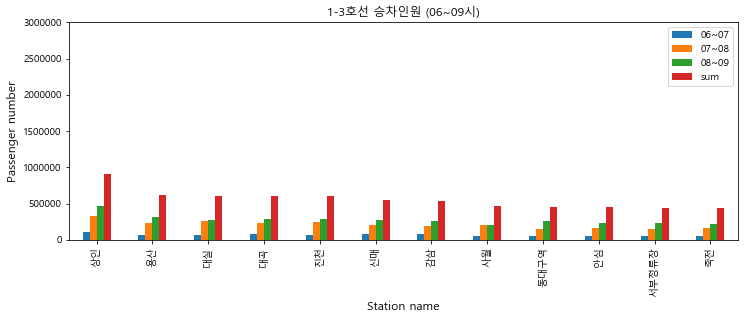

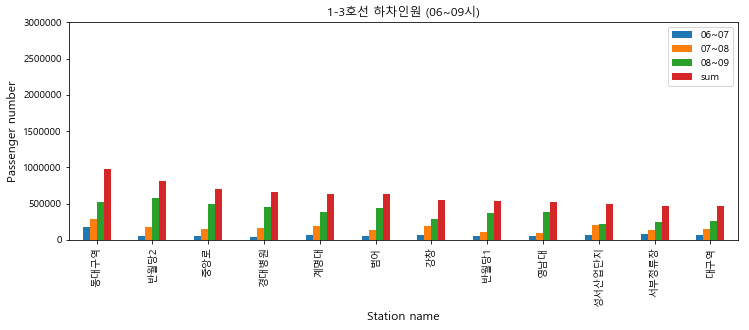

In [25]:
# top 12 station by passenger number during early morning time. 

up_total_아침_head = up_total_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = up_total_아침_head.plot(kind='bar', title='1-3호선 승차인원 (06~09시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)         
ax.set_ylabel('Passenger number', fontsize=12)    
ax.set_ylim(0, 3000000)

down_total_아침_head = down_total_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = down_total_아침_head.plot(kind='bar', title='1-3호선 하차인원 (06~09시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)         
ax.set_ylabel('Passenger number', fontsize=12)  
ax.set_ylim(0, 3000000)


(0, 3000000)

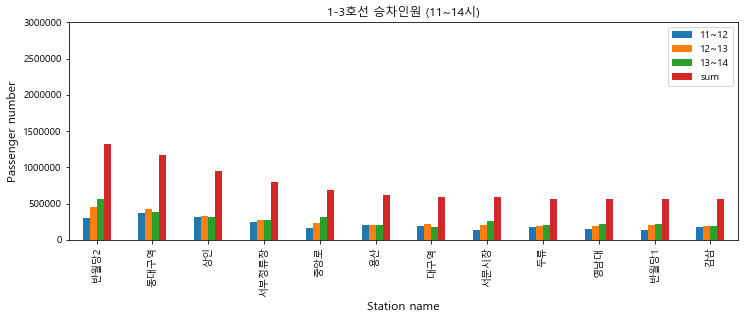

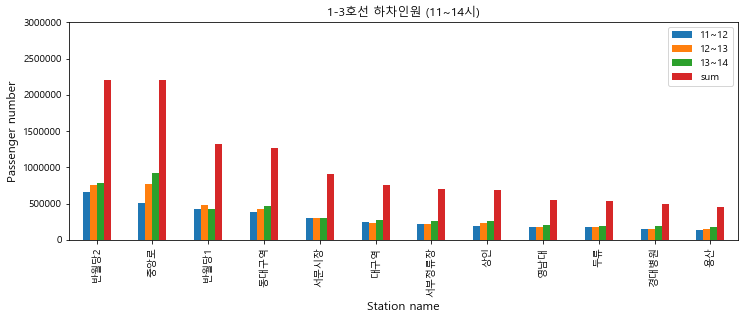

In [26]:
# lunch time 

up_total_점심_head = up_total_점심.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = up_total_점심_head.plot(kind='bar', title='1-3호선 승차인원 (11~14시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_total_점심_head = down_total_점심.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = down_total_점심_head.plot(kind='bar', title='1-3호선 하차인원 (11~14시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


아침보단 점심 시간대에 이용객수가 전반적으로 증가함, 특히 승차 인원보다 하차 인원 수가 훨씬 많음.  


(0, 3000000)

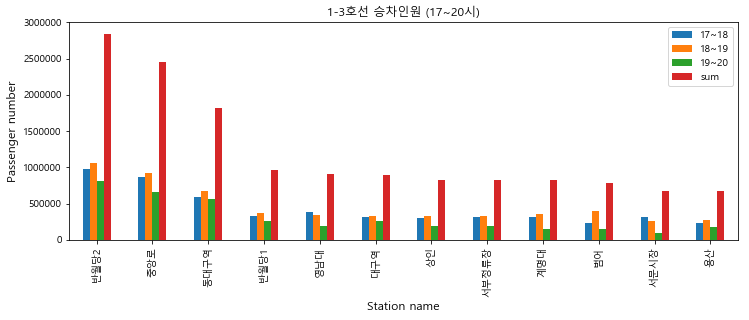

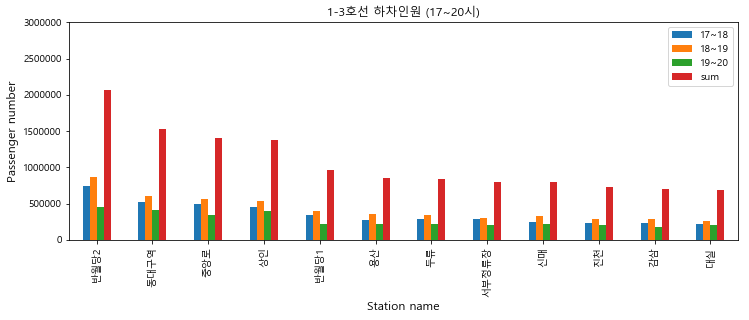

In [34]:
# evening time 

up_total_저녁_head = up_total_저녁.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = up_total_저녁_head.plot(kind='bar', title='1-3호선 승차인원 (17~20시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


down_total_저녁_head = down_total_저녁.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = down_total_저녁_head.plot(kind='bar', title='1-3호선 하차인원 (17~20시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


(0, 3000000)

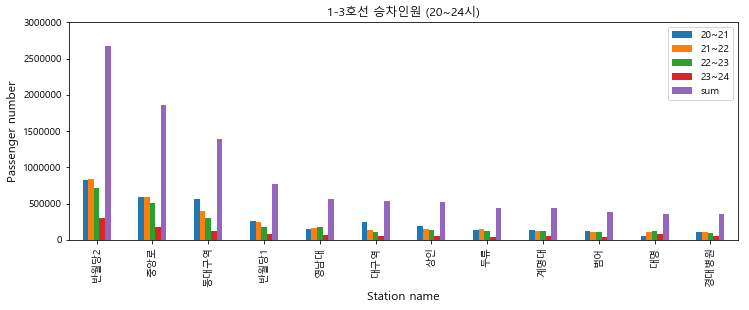

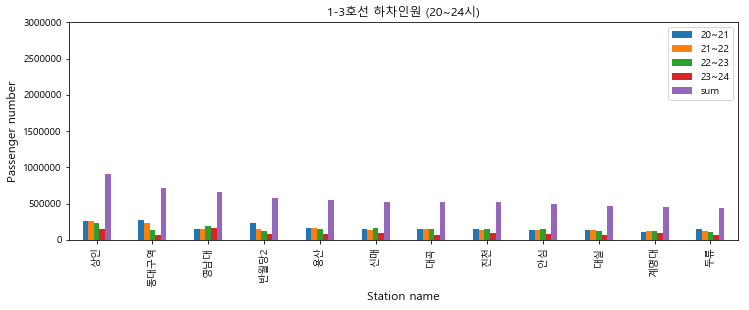

In [28]:
# night time 

up_total_밤_head = up_total_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = up_total_밤_head.plot(kind='bar', title='1-3호선 승차인원 (20~24시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


down_total_밤_head = down_total_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = down_total_밤_head.plot(kind='bar', title='1-3호선 하차인원 (20~24시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


저녁 및 밤 시간대 *승차인원수*가 하루 중 가장 큰 값을 이루고 있음. 퇴근 및 하교, 모임 후 귀가인원으로 유추됨. 

특히, 주요 환승역이자 상권이 큰 반월당(2호선,1호선 환승), 중앙로(1호선), 동대구역(1호선)이 가장 큰 값을 보임. 
또한, 영남대(2호선), 상인(1호선), 두류(2호선), 계명대(2호선), 범어(2호선)도 많은 승차 인원을 확보하고 있음.   

* 맵으로 만들 것. 

### 호선별 분석을 위한 데이터 프레임 
data frame of each subway line

In [31]:

#1호선 이름 추출
subway_one_name = subway[:64][subway['승하'] == '승차']
subway_one_name = subway_one_name['역명']
# print(subway_one_name.count())
#2호선 이름 추출
subway_two_name = subway[64:122][subway['승하'] == '승차']
subway_two_name = subway_two_name['역명']
# print(subway_two_name.count())
#3호선 이름 추출
subway_thr_name = subway[122:182][subway['승하'] == '승차']
subway_thr_name = subway_thr_name['역명']
#1호선
subway_one = subway[subway['역명'].isin(subway_one_name)]
up_one = subway_one[subway_one['승하'] == '승차']
up_one = up_one.groupby(['역명']).sum()
down_one = subway_one[subway_one['승하'] == '하차']
down_one = down_one.groupby(['역명']).sum()
#2호선
subway_two = subway[subway['역명'].isin(subway_two_name)]
up_two = subway_two[subway_two['승하'] == '승차']
up_two = up_two.groupby(['역명']).sum()
down_two = subway_two[subway_two['승하'] == '하차']
down_two = down_two.groupby(['역명']).sum()
# #3호선
subway_thr = subway[subway['역명'].isin(subway_thr_name)]
up_thr = subway_thr[subway_thr['승하'] == '승차']
up_thr = up_thr.groupby(['역명']).sum()
down_thr = subway_thr[subway_thr['승하'] == '하차']
down_thr = down_thr.groupby(['역명']).sum()


### 1호선 시간대별 데이터프레임 만들기
1st line grouping by time 

In [37]:
#승차_1호선_시간대별
up_one_아침 = up_one.loc[:,["06~07","07~08","08~09"]]
up_one_오전 = up_one.loc[:,["09~10","10~11"]]

up_one_점심 = up_one.loc[:,["11~12","12~13","13~14"]]
up_one_오후 = up_one.loc[:,["14~15","15~16","16~17"]]
up_one_저녁 = up_one.loc[:,["17~18","18~19","19~20"]]
up_one_밤 =  up_one.loc[:,["20~21","21~22","22~23","23~24"]]
#하차_1호선_시간대별
down_one_아침 = down_one.loc[:,["06~07","07~08","08~09"]]
down_one_오전 = down_one.loc[:,["09~10","10~11"]]
down_one_점심 = down_one.loc[:,["11~12","12~13","13~14"]]
down_one_오후 = down_one.loc[:,["14~15","15~16","16~17"]]
down_one_저녁 = down_one.loc[:,["17~18","18~19","19~20"]]
down_one_밤 =  down_one.loc[:,["20~21","21~22","22~23","23~24"]]

In [38]:
#시간대별 이용객 합계 열 추가
#아침시간: 06~09시
#오전 시간:09시~11시
#점심 시간: 11시~14시
#오후시간: 14시~17시
#저녁시간: 17~20시
#밤시간:20~24시
up_one_아침['sum'] = up_one_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
down_one_아침['sum'] = down_one_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
up_one_오전['sum'] = up_one_오전.apply(lambda row: (row['09~10'] + row['10~11']) ,axis=1)
down_one_오전['sum'] = down_one_오전.apply(lambda row: (row['09~10'] + row['10~11']),axis=1)
up_one_점심['sum'] = up_one_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
up_one_오후['sum'] = up_one_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
up_one_저녁['sum'] = up_one_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
up_one_밤['sum'] =  up_one_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)
down_one_점심['sum'] = down_one_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
down_one_오후['sum'] = down_one_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
down_one_저녁['sum'] = down_one_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
down_one_밤['sum'] =  down_one_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)

In [39]:
# up_one_출근.head(3)
down_one_밤.head(3)

,20~21,21~22,22~23,23~24,sum
역명,,,,,
각산,85756,86117,76863,53059,301795
교대,66368,57864,55166,42162,221560
대곡,150250,147631,152940,71365,522186


### 1호선 시간대별 이용객 분석 
chart of 1st line by time 

(0, 3000000)

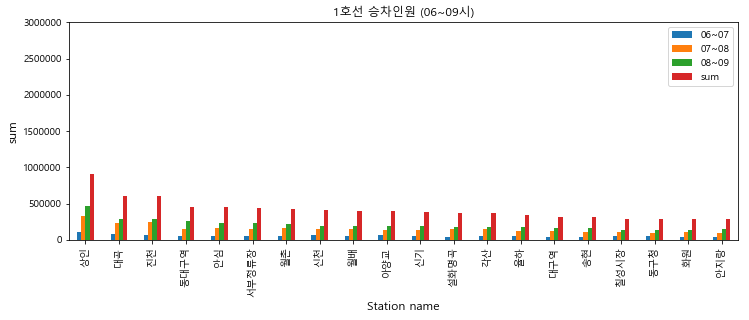

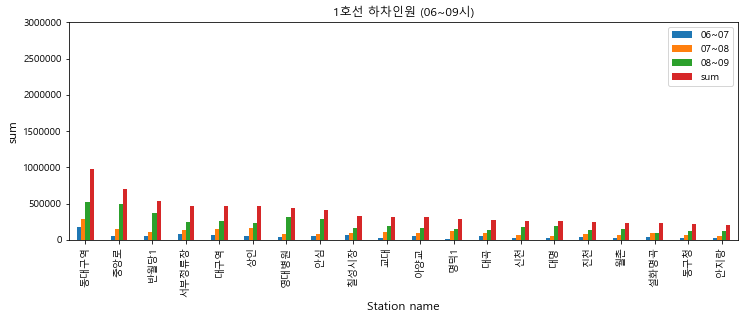

In [40]:

up_one_아침_head = up_one_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_아침_head.plot(kind='bar', title='1호선 승차인원 (06~09시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


down_one_아침_head = down_one_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_아침_head.plot(kind='bar', title='1호선 하차인원 (06~09시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


+ 출근시간 승차 지역: 주거지역일 확률이 높음.
+ 출근시간 하차 지역: (특이역- 기차역/환승역/고속버스정류장 등 제외)이 많이 포함되어있고, 버스 환승을 위해 내리는 역이 포함되어있을 수 있기에, 최종 도착지를 알기는 어려움.  

추가로 데이터 확인을 한다면, 주소지별 거주인원 정보를 확인해볼 수 있음.

### 1호선- 오전 


(0, 3000000)

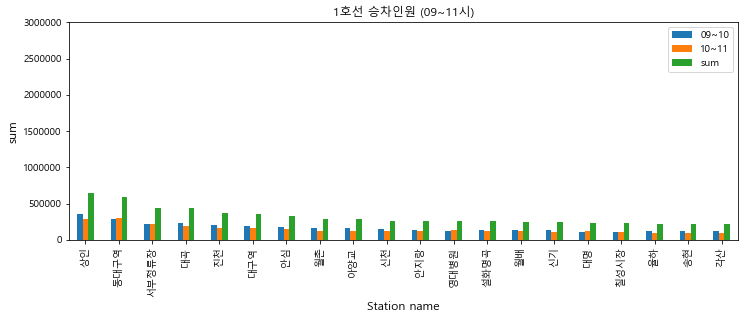

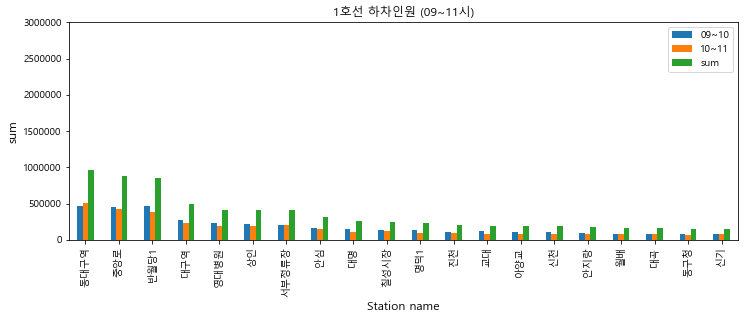

In [41]:
up_one_오전_head = up_one_오전.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_오전_head.plot(kind='bar', title='1호선 승차인원 (09~11시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


down_one_오전_head = down_one_오전.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_오전_head.plot(kind='bar', title='1호선 하차인원 (09~11시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


### 동대구역의 승하차 인원이 높은 이유를 몇가지 가능성을 유추해보면, 
* 버스로 환승
* 동대구 고속버스터미널 이용객 (대구 도착, 대구 출발)
* 동대구역 기차 이용객 (대구 도착, 대구 출발)
* 이외 동대구역 부근 시설 이용 

### 승하차 인원이 높은 이유 유추 
+ 주변에 고속버스터미널/기차역 있는가
+ 상권이 발달한 곳인가 
+ 버스 및 기타 다른 교통으로 환승하는 곳인가

확인 가능한 관련 데이터가 있는 경우 확인.

###  1호선/점심

(0, 3000000)

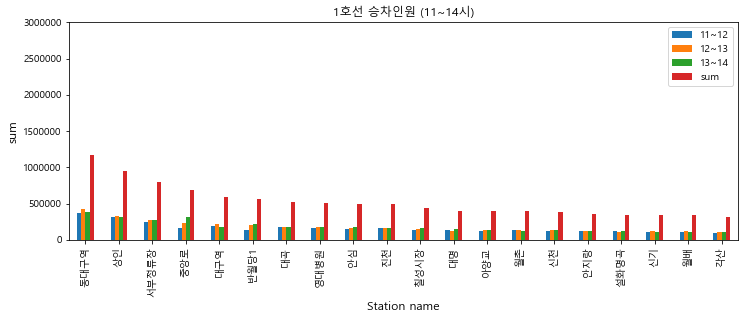

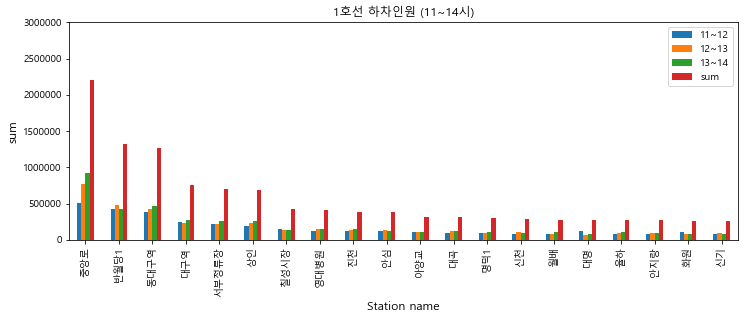

In [42]:
up_one_점심_head = up_one_점심.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_점심_head.plot(kind='bar', title='1호선 승차인원 (11~14시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)

down_one_점심_head = down_one_점심.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_점심_head.plot(kind='bar', title='1호선 하차인원 (11~14시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


### 1호선/오후

(0, 3000000)

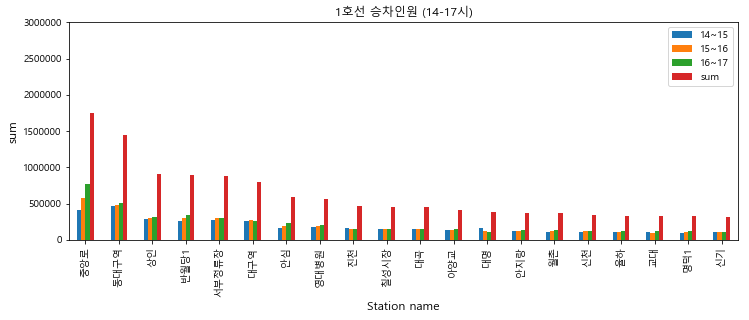

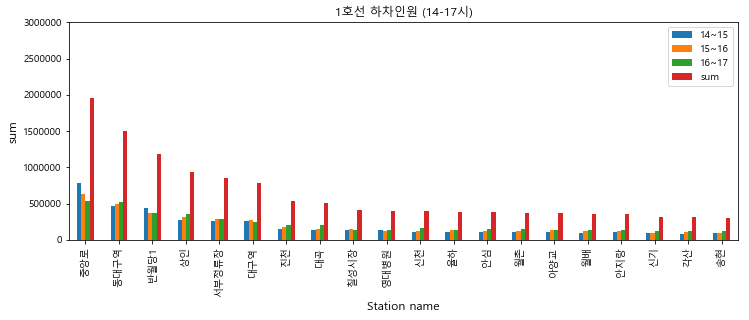

In [43]:
up_one_오후_head = up_one_오후.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_오후_head.plot(kind='bar', title='1호선 승차인원 (14-17시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


down_one_오후_head = down_one_오후.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_오후_head.plot(kind='bar', title='1호선 하차인원 (14-17시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


### 1호선/저녁

(0, 3000000)

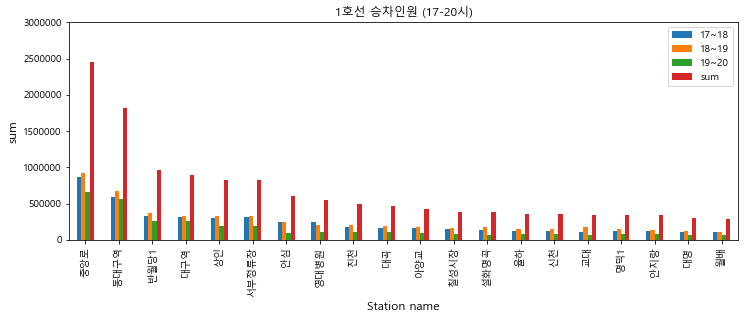

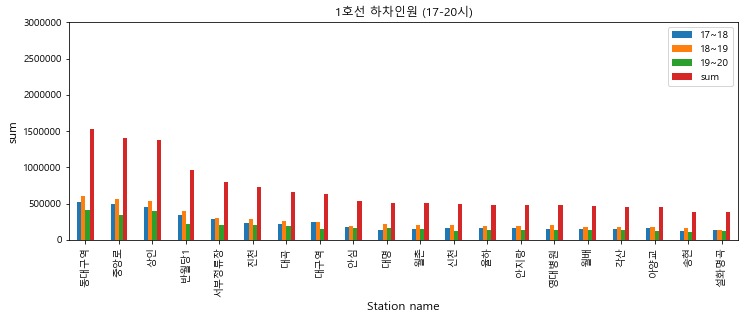

In [44]:
up_one_저녁_head = up_one_저녁.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_저녁_head.plot(kind='bar', title='1호선 승차인원 (17-20시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


down_one_저녁_head = down_one_저녁.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_저녁_head.plot(kind='bar', title='1호선 하차인원 (17-20시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


### 시간의 특성 (17~20시)
+ 퇴근 - 주변 직장 갯수와 비교 가능 
+ 하교 - 주변 학교 갯수와 비교 가능  
+ 저녁시간대 모임
+ 환승/시외버스 및 기차이용/ 기타 이유로 이용 

#### 추가비교자료 아이디어: 승하차 인원 높은 지하철역 부근의 백화점 매출액을 비교할 수 있는가? 
- 동대구역 신세계 백화점
- 중앙로역 롯데백화점
- 반월당역 동아백화점 
- 반월당역 현대백화점 

순위가 일치하는가?

### 1호선/밤

(0, 3000000)

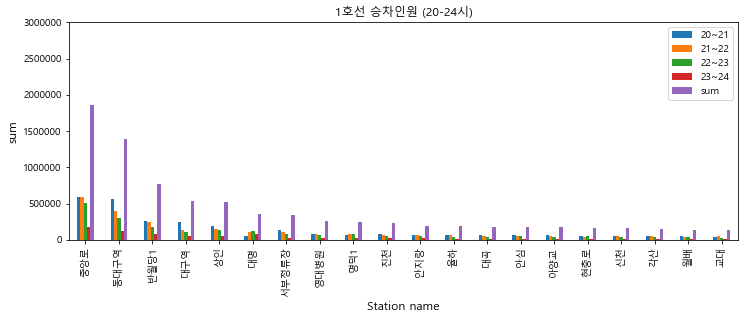

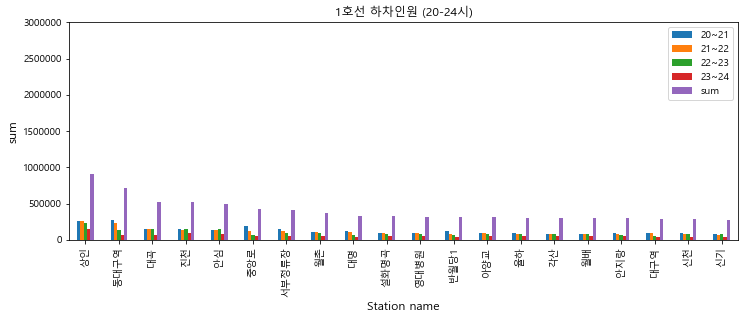

In [45]:
up_one_밤_head = up_one_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_밤_head.plot(kind='bar', title='1호선 승차인원 (20-24시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


down_one_밤_head = down_one_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_밤_head.plot(kind='bar', title='1호선 하차인원 (20-24시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
# plt.legend(fontsize='x-large', prop=fontprop)
ax.set_ylim(0, 3000000)


#### 23-24시에 승차 이용객 유추  

+ 승차 역에서 귀가 전까지 머무름
(핫플지수에 산입가능)
+ 버스-지하철 환승객

#### 23-24시 하차 이용객 유추 
+ 하차역에 거주자 (거주지 지수 산입가능)
+ 하차역에서 지하철-버스환승x(버스는 거의 환승 불가능)

거주자로 유추되는 지역은 실제 거주 인원 데이터와 함께 부동산 가격 비교 및 시내접근하는 소요 교통시간을 비교하면 관련도가 높을 것으로 보임. 

## 2호선
line num 2

In [47]:
#승차_2호선_시간대별
up_two_아침 = up_two.loc[:,["역명","승하","06~07","07~08","08~09"]]
up_two_오전 = up_two.loc[:,["역명","승하","09~10","10~11"]]

up_two_점심 = up_two.loc[:,["역명","승하","11~12","12~13","13~14"]]
up_two_오후 = up_two.loc[:,["역명","승하","14~15","15~16","16~17"]]
up_two_저녁 = up_two.loc[:,["역명","승하","17~18","18~19","19~20"]]
up_two_밤 =  up_two.loc[:,["역명","승하","20~21","21~22","22~23","23~24"]]
#하차_2호선_시간대별
down_two_아침 = down_two.loc[:,["역명","승하","06~07","07~08","08~09"]]
down_two_오전 = down_two.loc[:,["역명","승하","09~10","10~11"]]

down_two_점심 = down_two.loc[:,["역명","승하","11~12","12~13","13~14"]]

down_two_오후 = down_two.loc[:,["역명","승하","14~15","15~16","16~17"]]
down_two_저녁 = down_two.loc[:,["역명","승하","17~18","18~19","19~20"]]
down_two_밤 =  down_two.loc[:,["역명","승하","20~21","21~22","22~23","23~24"]]

In [48]:
#시간대별 이용객 합계 열 추가
#아침시간: 06~09시
#오전 시간:09시~11시
#점심 시간: 11시~14시
#오후시간: 14시~17시
#저녁시간: 17~20시
#밤시간:20~24시
up_two_아침['sum'] = up_two_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
down_two_아침['sum'] = down_two_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
up_two_오전['sum'] = up_two_오전.apply(lambda row: (row['09~10'] + row['10~11']) ,axis=1)
down_two_오전['sum'] = down_two_오전.apply(lambda row: (row['09~10'] + row['10~11']),axis=1)
up_two_점심['sum'] = up_two_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
up_two_오후['sum'] = up_two_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
up_two_저녁['sum'] = up_two_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
up_two_밤['sum'] =  up_two_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)
down_two_점심['sum'] = down_two_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
down_two_오후['sum'] = down_two_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
down_two_저녁['sum'] = down_two_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
down_two_밤['sum'] =  down_two_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)

(0, 3000000)

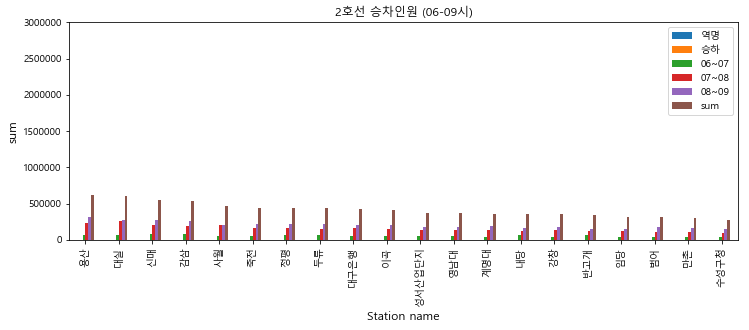

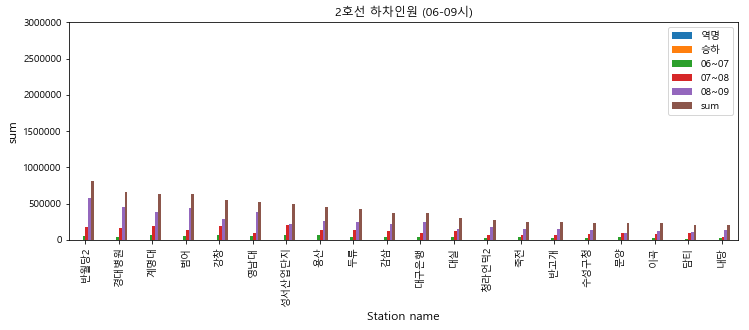

In [49]:
up_two_아침_head = up_two_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_two_아침_head.plot(kind='bar', title='2호선 승차인원 (06-09시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)

down_two_아침_head = down_two_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)
ax = down_two_아침_head.plot(kind='bar', title='2호선 하차인원 (06-09시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


(0, 3000000)

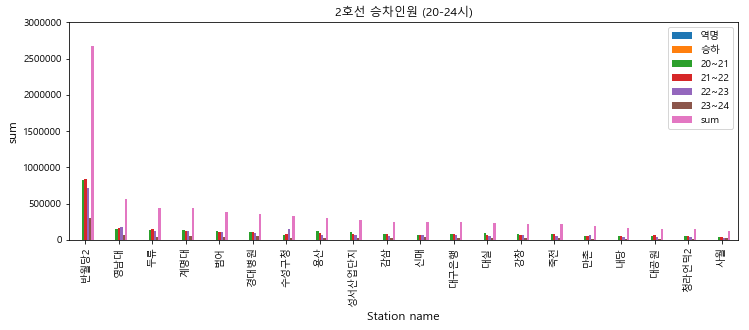

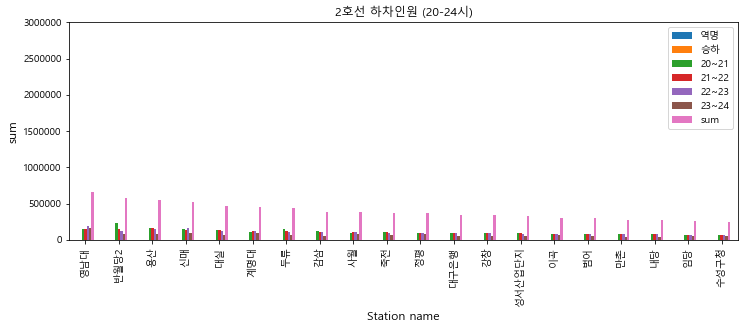

In [50]:
up_two_밤_head = up_two_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_two_밤_head.plot(kind='bar', title='2호선 승차인원 (20-24시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)

down_two_밤_head = down_two_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)
ax = down_two_밤_head.plot(kind='bar', title='2호선 하차인원 (20-24시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


#### 1호선 반월당역과 2호선 반월당역의 비교
하차하는 지하철역이 1호선에 있는지 2호선에 있는지의 차이일 수 있음. 
또한, 마지막 타임의 승차인원의 합과 하차인원의 합이 거의 같을 것.

## 3호선

- 수정할사항: 역간 비교는 이용객수의 차이가 많이 나지 않으므로 , 시간대별 전체 이용객수를 비교하는 그래프를 그리는 것이 나을듯. 

In [51]:
#승차_3호선_시간대별
up_thr_아침 = up_thr.loc[:,["역명","승하","06~07","07~08","08~09"]]
up_thr_오전 = up_thr.loc[:,["역명","승하","09~10","10~11"]]
up_thr_점심 = up_thr.loc[:,["역명","승하","11~12","12~13","13~14"]]
up_thr_오후 = up_thr.loc[:,["역명","승하","14~15","15~16","16~17"]]
up_thr_저녁 = up_thr.loc[:,["역명","승하","17~18","18~19","19~20"]]
up_thr_밤 =  up_thr.loc[:,["역명","승하","20~21","21~22","22~23","23~24"]]
#하차_3호선_시간대별
down_thr_아침 = down_thr.loc[:,["역명","승하","06~07","07~08","08~09"]]
down_thr_오전 = down_thr.loc[:,["역명","승하","09~10","10~11"]]
down_thr_점심 = down_thr.loc[:,["역명","승하","11~12","12~13","13~14"]]
down_thr_오후 = down_thr.loc[:,["역명","승하","14~15","15~16","16~17"]]
down_thr_저녁 = down_thr.loc[:,["역명","승하","17~18","18~19","19~20"]]
down_thr_밤 =  down_thr.loc[:,["역명","승하","20~21","21~22","22~23","23~24"]]

In [52]:
#시간대별 이용객 합계 열 추가
#아침시간: 06~09시
#오전 시간:09시~11시
#점심 시간: 11시~14시
#오후시간: 14시~17시
#저녁시간: 17~20시
#밤시간:20~24시
up_thr_아침['sum'] = up_thr_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
down_thr_아침['sum'] = down_thr_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
up_thr_오전['sum'] = up_thr_오전.apply(lambda row: (row['09~10'] + row['10~11']) ,axis=1)
down_thr_오전['sum'] = down_thr_오전.apply(lambda row: (row['09~10'] + row['10~11']),axis=1)
up_thr_점심['sum'] = up_thr_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
up_thr_오후['sum'] = up_thr_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
up_thr_저녁['sum'] = up_thr_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
up_thr_밤['sum'] =  up_thr_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)
down_thr_점심['sum'] = down_thr_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
down_thr_오후['sum'] = down_thr_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
down_thr_저녁['sum'] = down_thr_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
down_thr_밤['sum'] =  down_thr_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)

(0, 3000000)

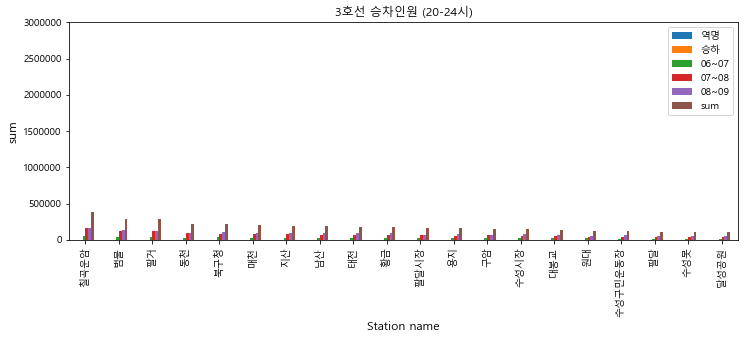

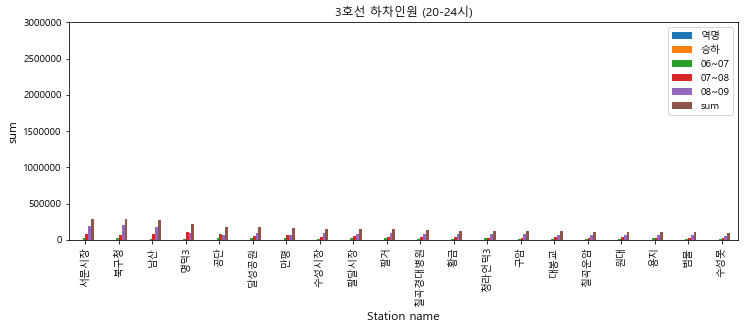

In [53]:
up_thr_아침_head = up_thr_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_thr_아침_head.plot(kind='bar', title='3호선 승차인원 (20-24시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)

down_thr_아침_head = down_thr_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)
ax = down_thr_아침_head.plot(kind='bar', title='3호선 하차인원 (20-24시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


### 주말/평일 주요역 비교
comparing major stations on weekdays vs weekends

In [55]:
from datetime import date
import numpy as np
subway = pd.read_csv("C:/Users/Juyeon/Downloads/subway.csv", encoding="CP949")
subway = subway.loc[:,["월","일","역명","승하","17~18","18~19","19~20","20~21","21~22","22~23","23~24"]]
subway.loc[subway['역명'].isin(['반월당1','반월당2']), '역명'] = '반월당'
subway = subway[subway['역명'].isin(['중앙로','반월당','동대구역','상인'])]

def printDayOfTheWeek (year, month, day):
    day = date(year, month, day).weekday()
    if day==4 or day==5 or day==6:
        return '주말'
    else:
        return '평일'

subway['week'] = np.nan
week, myYear = [], 2019
for i in range(subway.shape[0]):
    myMonth, myDay = subway.iloc[i]['월'], subway.iloc[i]['일']
    week.append(printDayOfTheWeek(myYear, myMonth, myDay))
    
subway['week'] = week
up = subway[subway['승하'] == '승차']
down = subway[subway['승하'] == '하차']

In [56]:
up = up.groupby(['역명','week']).mean()
down = down.groupby(['역명','week']).mean()

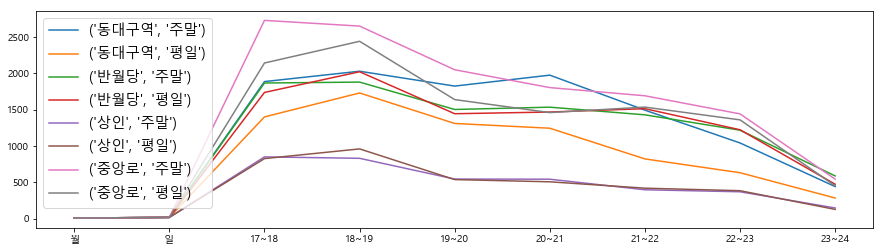

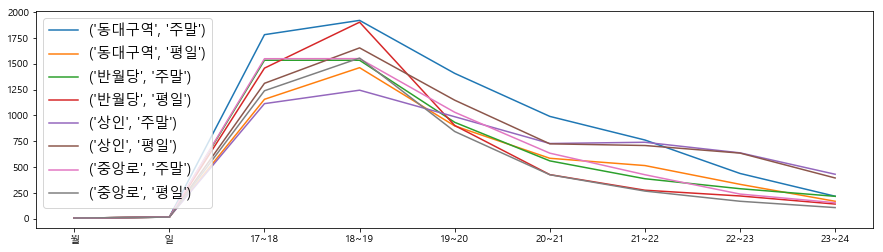

In [57]:
plt.figure(figsize=(15, 4))
for i in range(up.shape[0]):
    plt.plot(up.iloc[i], label=up.iloc[i].name)
plt.legend(fontsize='x-large')
plt.show()
plt.figure(figsize=(15, 4))
for i in range(down.shape[0]):
    plt.plot(down.iloc[i], label=down.iloc[i].name)
plt.legend(fontsize='x-large')
plt.show()

#### 승차
이용인원 순위 
1. 주말 중앙로
2. 평일 중앙로
3. 주말 동대구역 
4. 평일 반월당
5. 주말 반월당 
6. 평일 동대구역
7. 평일 상인역
8. 주말 상인역

#### 하차 
1. 주말 동대구역
2. 평일 반월당 
3. 평일 상인역
